In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/kirtan/Downloads/laptop_data_cleaned.csv')

In [3]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [4]:
df.shape

(1273, 13)

In [5]:
df.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [7]:
Categorical_Col = []
Numercal_Col = []

In [8]:
for col in df.columns:
    if df[col].dtype == 'object':
        Categorical_Col.append(col)
        
    else:
        Numercal_Col.append(col)

In [9]:
Categorical_Col

['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os']

In [10]:
Numercal_Col

['Ram', 'Weight', 'Price', 'TouchScreen', 'Ips', 'Ppi', 'HDD', 'SSD']

In [11]:
for col in Categorical_Col:
    print(df[col].unique())

['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
['Intel Core i5' 'Intel Core i7' 'AMD Processor' 'Intel Core i3'
 'Other Intel Processor']
['Intel' 'AMD' 'Nvidia']
['Mac' 'Others' 'Windows']


# Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
LE = LabelEncoder()

Appling Label Encoding on column which has <= 3 categorical values and appling Categorical Encoding on left columns.

In [14]:
for col in Categorical_Col:
    if len(df[col].unique()) <= 3:
        df[col] = LE.fit_transform(df[col])
        
    else:
        count_encoding = df[col].value_counts()
        df[col] = df[col].map(count_encoding)


In [15]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,21,194,8,1.37,11.175755,0,1,226.983005,423,0,128,1,0
1,21,194,8,1.34,10.776777,0,0,127.677940,423,0,0,1,0
2,268,706,8,1.86,10.329931,0,0,141.211998,423,0,256,1,1
3,21,194,16,1.83,11.814476,0,1,220.534624,515,0,512,0,0
4,21,194,8,1.37,11.473101,0,1,226.983005,423,0,256,1,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   int64  
 1   TypeName     1273 non-null   int64  
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   int64  
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   int64  
 12  Os           1273 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 129.4 KB


# Data Visualization

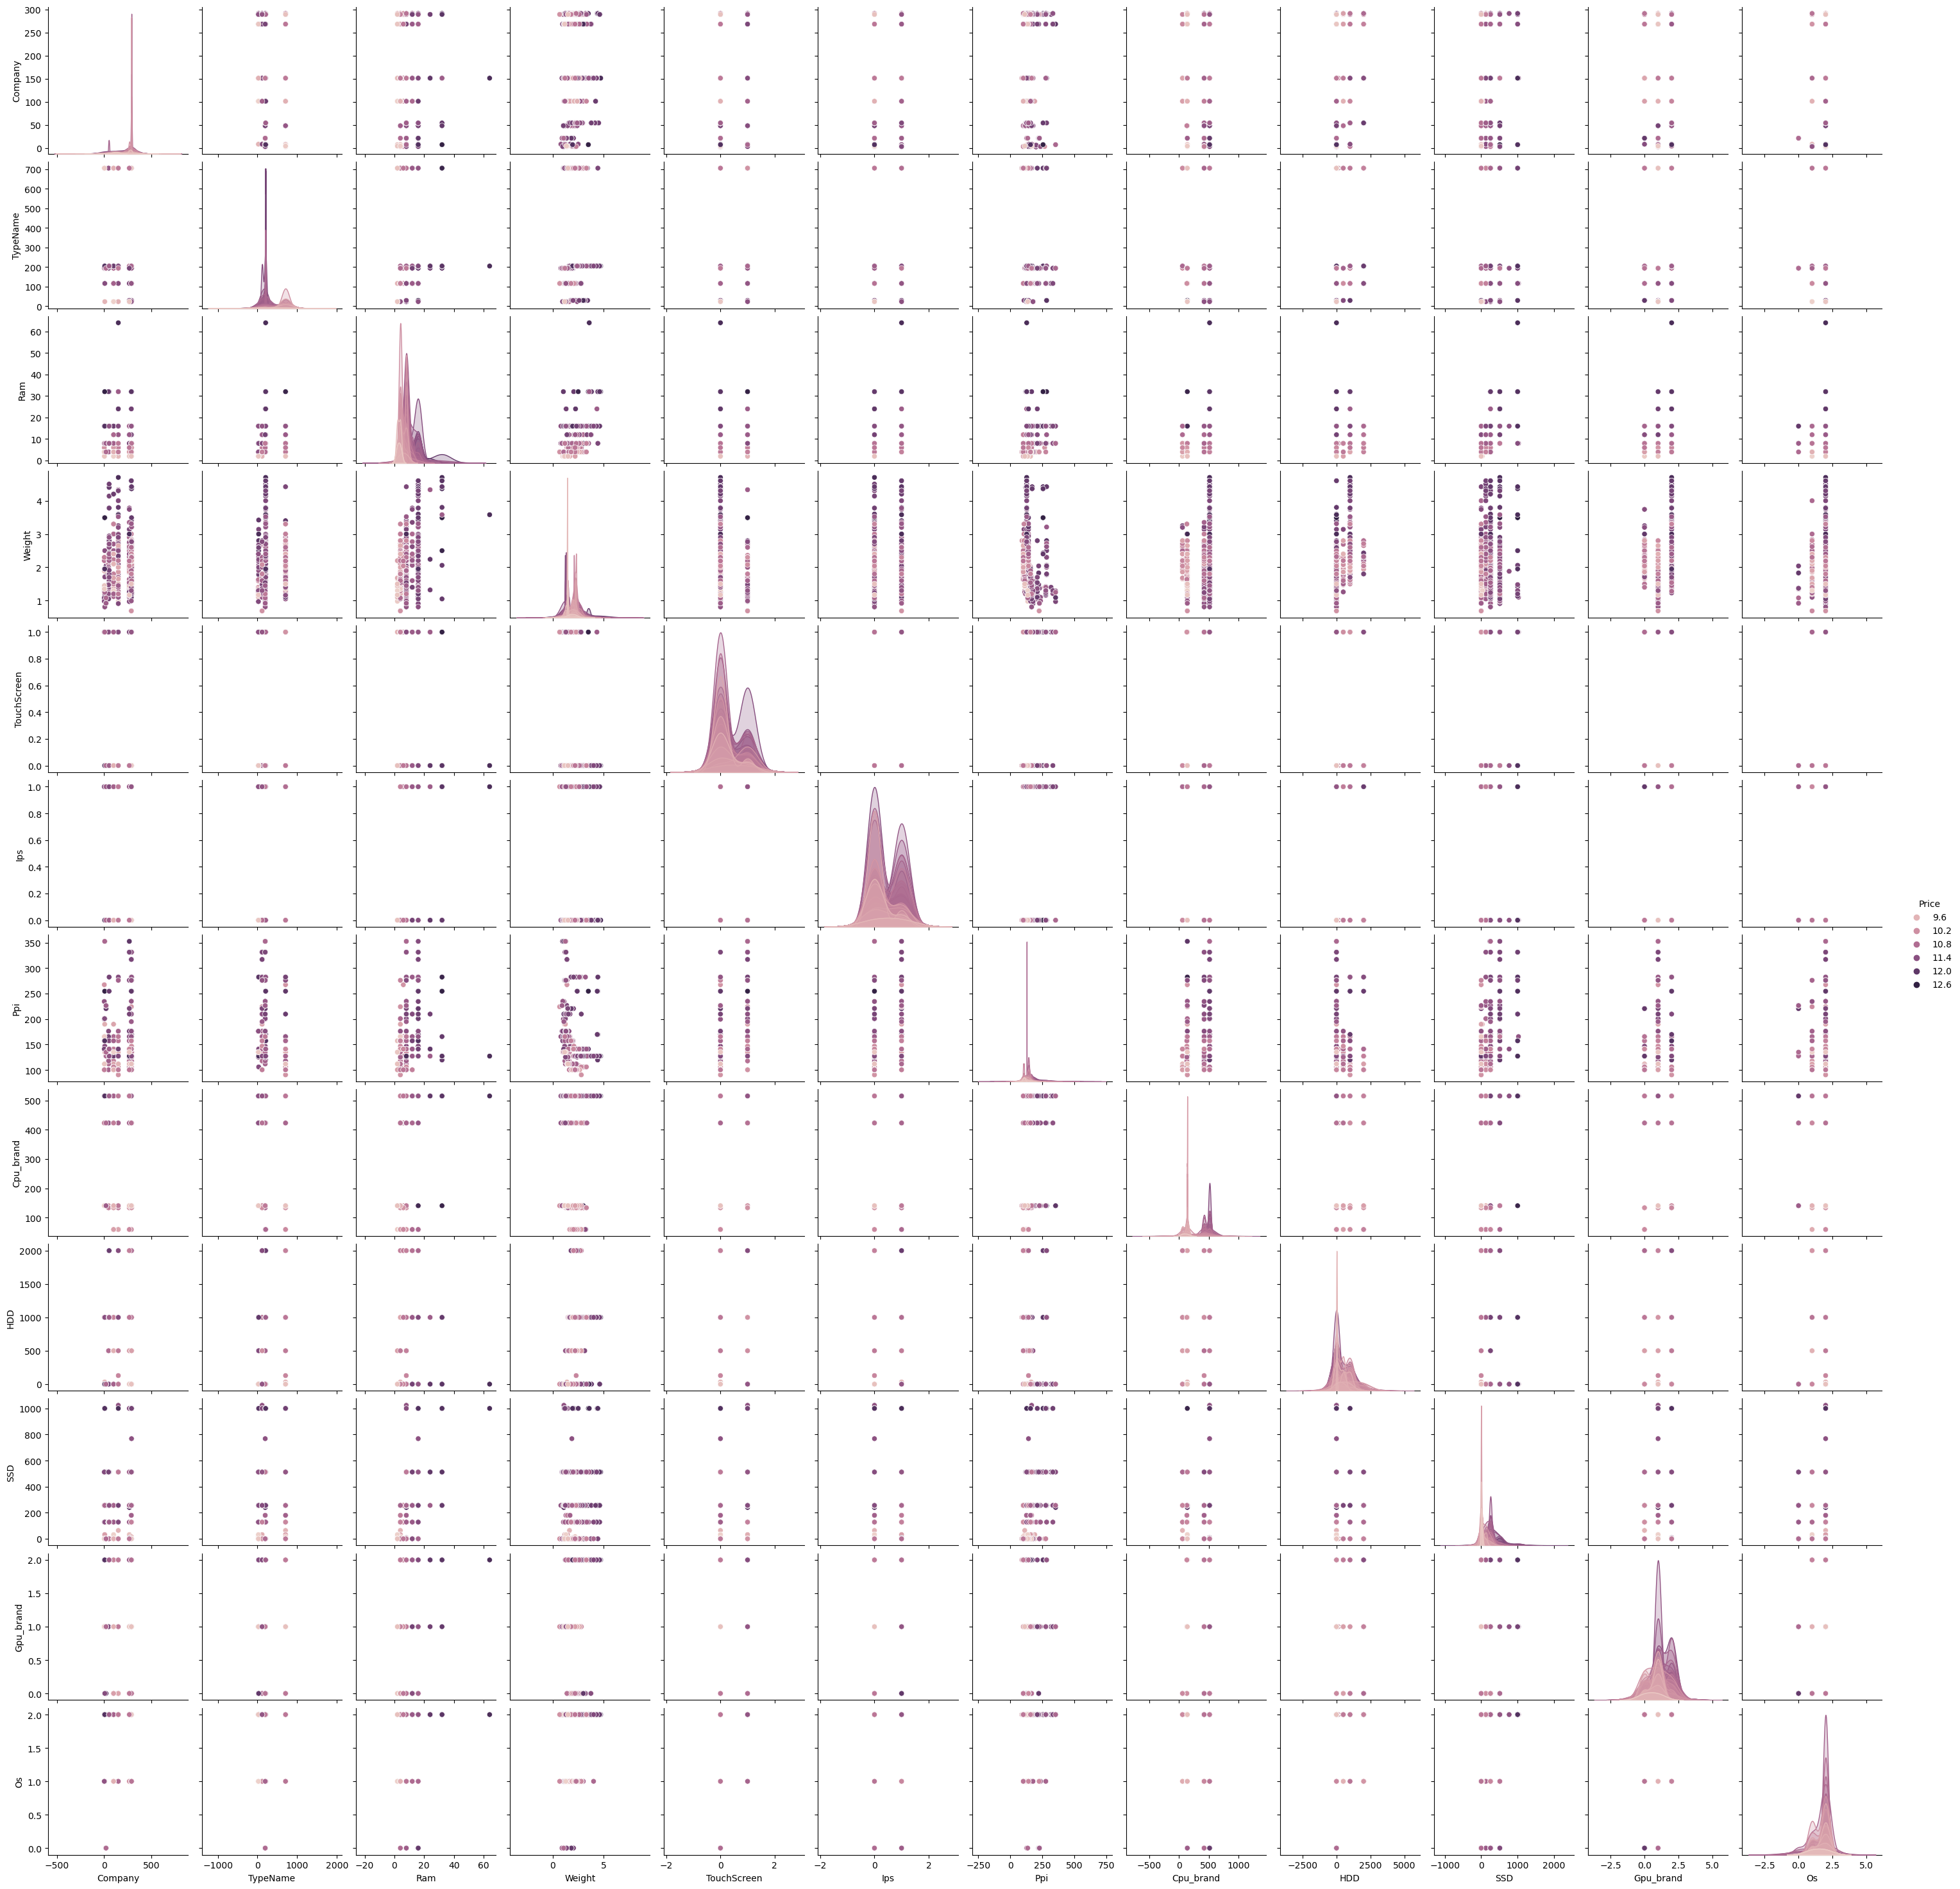

In [17]:
sns.pairplot(df,hue='Price')
plt.show()

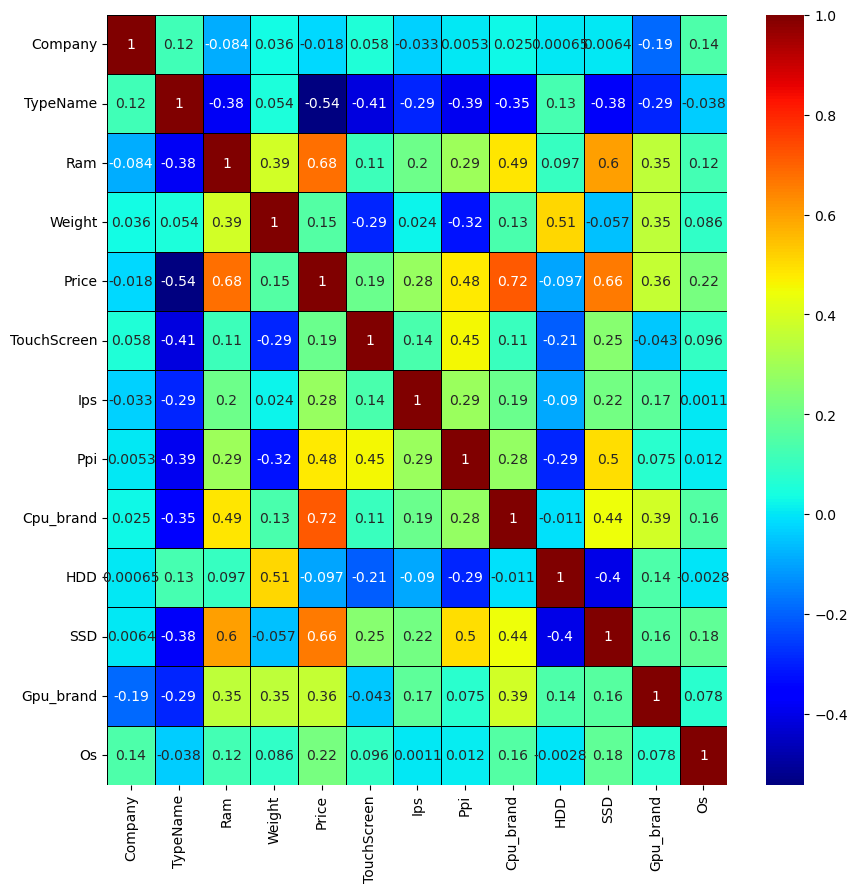

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='jet',linecolor='black',linewidths=0.5)
plt.show()

# Train & Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.drop(columns='Price',axis=1)
X

,Company,TypeName,Ram,Weight,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,21,194,8,1.37,0,1,226.983005,423,0,128,1,0
1,21,194,8,1.34,0,0,127.677940,423,0,0,1,0
2,268,706,8,1.86,0,0,141.211998,423,0,256,1,1
3,21,194,16,1.83,0,1,220.534624,515,0,512,0,0
4,21,194,8,1.37,0,1,226.983005,423,0,256,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1268,151,706,4,2.20,0,0,100.454670,515,500,0,2,2
1269,289,116,4,1.80,1,1,157.350512,515,0,128,1,2
1270,289,116,16,1.30,1,1,276.053530,515,0,512,1,2
1271,289,706,2,1.50,0,0,111.935204,141,0,0,1,2


In [21]:
y = df['Price']
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1268    10.555257
1269    10.433899
1270    11.288115
1271     9.409283
1272    10.614129
Name: Price, Length: 1273, dtype: float64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
LR = LinearRegression()

In [25]:
LR.fit(X_train,y_train)

LinearRegression()

In [26]:
y_hat = LR.predict(X_test)

# Model Evaluation

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
print(mean_absolute_error(y_test,y_hat))

0.23557516645646465


In [29]:
print(mean_squared_error(y_test,y_hat))

0.08731499873211743


# Best-Fit Line

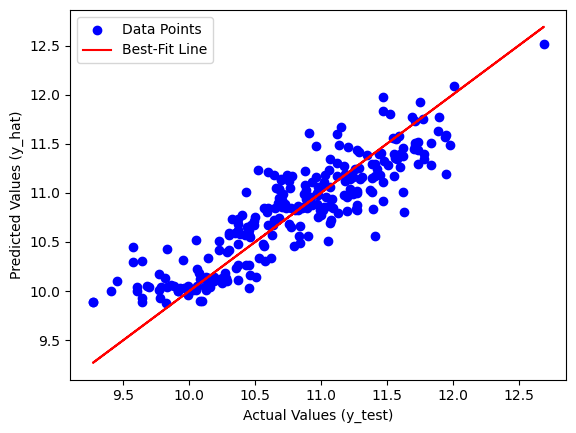

In [30]:
# Plotting the best-fit line
plt.scatter(y_test, y_hat, color='blue', label='Data Points')
plt.plot(y_test, y_test, color='red', label='Best-Fit Line')

# Add labels and a legend to the plot
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_hat)')
plt.legend()

# Show the plot
plt.show()
